# Introduction -

# What we need to do here- 
        You have to build separate models that can predict the minimum temperature for the next day and 
        the maximum temperature for the next day based on the details provided in the dataset.

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
temp=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
temp.tail(2)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


In [4]:
temp.sample(2)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7515,16.0,21-08-2017,27.3,23.0,49.764904,86.80088,30.173525,24.245898,5.833382,85.482009,...,0.0,0.000000,0.000000,37.4697,126.995,82.2912,2.2579,4754.415039,31.0,22.0
162,13.0,06-07-2013,31.3,23.0,58.290718,90.81321,30.220495,23.879146,6.746961,46.555481,...,0.0,0.042007,12.216177,37.5776,127.083,59.8324,2.6865,5819.253906,29.2,23.1


# Making Values upto 2 Decimals

In [5]:
temp[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']] = temp[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']].round(2)

In [6]:
temp.head(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.26,91.12,28.07,23.01,6.82,69.45,...,0.0,0.0,0.0,37.60,126.99,212.34,2.78,5992.90,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.26,90.60,29.85,24.04,5.69,51.94,...,0.0,0.0,0.0,37.60,127.03,44.76,0.51,5869.31,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.69,83.97,30.09,24.57,6.14,20.57,...,0.0,0.0,0.0,37.58,127.06,33.31,0.27,5863.56,31.1,23.9


In [7]:
temp.shape

(7752, 25)

In [8]:
temp.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [9]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# Observation - 
    1. Dataset contains 7752 rows and 25 columns
    2. Dataset contains 2 datatype One is Object 2nd is Float

In [10]:
temp.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

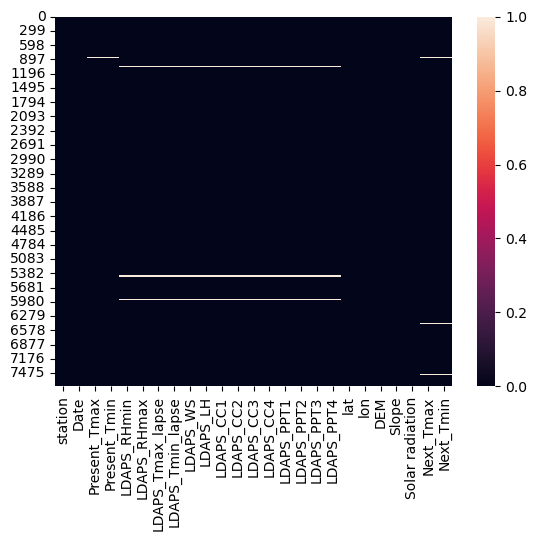

In [11]:
sns.heatmap(temp.isnull())

# Observation - 
        It seems like there is huge Null Value present in the dataset Only in 5 colmns have no null value otherwise every column
        contains Null value.

In [12]:
temp.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         4193
LDAPS_RHmax         2556
LDAPS_Tmax_lapse    1379
LDAPS_Tmin_lapse    1144
LDAPS_WS            1031
LDAPS_LH            5575
LDAPS_CC1             98
LDAPS_CC2             98
LDAPS_CC3             99
LDAPS_CC4             98
LDAPS_PPT1           634
LDAPS_PPT2           580
LDAPS_PPT3           422
LDAPS_PPT4           407
lat                   12
lon                   18
DEM                   25
Slope                 22
Solar radiation     1570
Next_Tmax            183
Next_Tmin            157
dtype: int64

# Lets Separate Date column into Day, Month & Year

In [13]:
temp['day'] = pd.to_datetime(temp['Date']).dt.day
temp['month'] = pd.to_datetime(temp['Date']).dt.month
temp['year'] = pd.to_datetime(temp['Date']).dt.year

In [14]:
# Dropping Date Column
temp.drop(columns='Date',inplace=True)

In [15]:
temp.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.26,91.12,28.07,23.01,6.82,69.45,0.23,...,37.60,126.99,212.34,2.78,5992.90,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.26,90.60,29.85,24.04,5.69,51.94,0.23,...,37.60,127.03,44.76,0.51,5869.31,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.69,83.97,30.09,24.57,6.14,20.57,0.21,...,37.58,127.06,33.31,0.27,5863.56,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.24,96.48,29.70,23.33,5.65,65.73,0.22,...,37.65,127.02,45.72,2.53,5856.96,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.17,90.16,29.11,23.49,5.74,107.97,0.15,...,37.55,127.14,35.04,0.51,5859.55,31.2,22.5,30.0,6.0,2013.0


In [16]:
# Lets fill the Null Values using Mean method

In [17]:
for col in temp.columns:
    temp[col].fillna(temp[col].mean(), inplace=True)

In [18]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


In [19]:
# Now Data is proper fit and there are no null values

<Axes: >

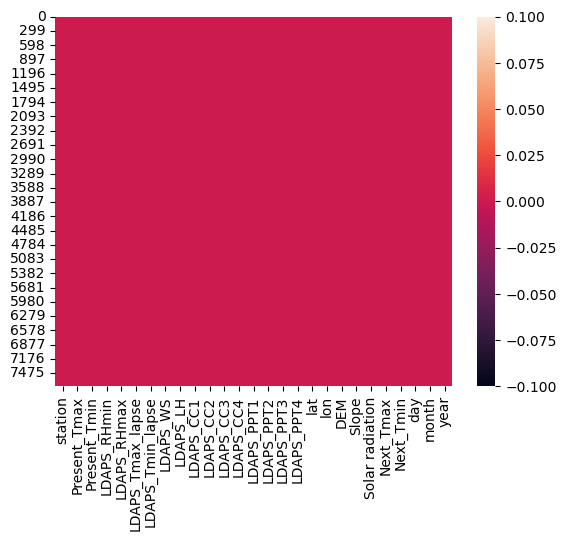

In [20]:
sns.heatmap(temp.isna())

In [21]:
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759402,88.374846,29.613405,23.512593,7.097849,62.505071,0.368757,...,37.545203,126.991998,61.868629,1.257157,5341.502887,30.274887,22.932220,15.983871,7.467742,2015.000000
std,7.210637,2.956557,2.403036,14.596934,7.157145,2.932885,2.334035,2.173225,33.566988,0.261185,...,0.050547,0.078774,54.280001,1.370341,429.158951,3.122557,2.483276,8.917496,0.530265,1.414122
min,1.000000,20.000000,11.300000,19.790000,58.940000,17.620000,14.270000,2.880000,-13.600000,0.000000,...,37.460000,126.830000,12.370000,0.100000,4329.520000,17.400000,11.300000,1.000000,6.000000,2013.000000
25%,7.000000,27.800000,21.700000,46.050000,84.317500,27.690000,22.110000,5.690000,37.535000,0.150000,...,37.510000,126.940000,28.700000,0.270000,4999.020000,28.200000,21.400000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.315000,89.700000,29.660000,23.740000,6.560000,57.310000,0.320000,...,37.550000,127.000000,45.720000,0.620000,5436.345000,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.035000,93.700000,31.682500,25.132500,8.010000,83.907500,0.570000,...,37.580000,127.040000,59.830000,1.770000,5728.320000,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.520000,100.000000,38.540000,29.620000,21.860000,213.410000,0.970000,...,37.650000,127.140000,212.340000,5.180000,5992.900000,38.900000,29.800000,31.000000,8.000000,2017.000000


# Statistics Observation - 
    1. The mean and median of the all columns looks similar but there is Huge Difference between 'Solar Radiation' & 'DEM' column
    2. That means there is Positve Skewness present in the dataset.
    3. Standard Deviation looks very high in some of the columns ('Solar Radiation','DEM','LDAPS_LH','LDAPS_RHmax',etc)

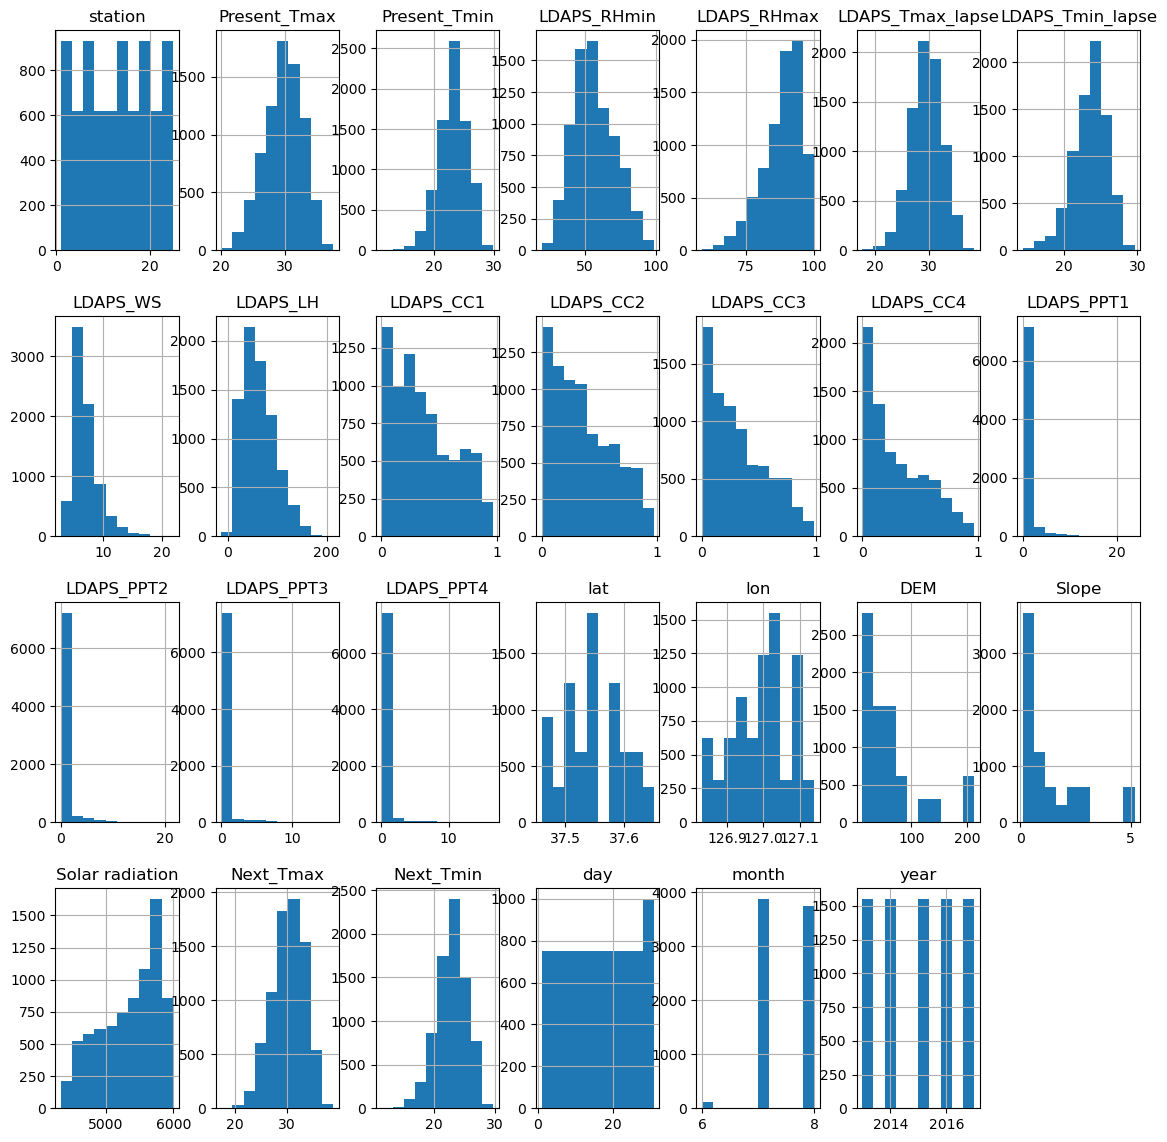

In [22]:
temp.hist(figsize=(14,14),grid=True,layout=(4,7))
plt.show()

In [23]:
temp.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300207
LDAPS_RHmax        -0.855038
LDAPS_Tmax_lapse   -0.227859
LDAPS_Tmin_lapse   -0.581867
LDAPS_WS            1.579251
LDAPS_LH            0.673757
LDAPS_CC1           0.459035
LDAPS_CC2           0.471369
LDAPS_CC3           0.640772
LDAPS_CC4           0.665851
LDAPS_PPT1          5.393694
LDAPS_PPT2          5.775238
LDAPS_PPT3          6.457493
LDAPS_PPT4          6.825558
lat                 0.135387
lon                -0.249741
DEM                 1.723336
Slope               1.564483
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
day                -0.008926
month              -0.195889
year                0.000000
dtype: float64

# Lets Remove the Skewness from tha columns Using Log Method

In [24]:
temp['LDAPS_PPT1'] = np.log(temp['LDAPS_PPT1'] + .5)  # Add 1 to avoid taking the log of 0

# Calculate skewness after transformation
skewness_after = temp['LDAPS_PPT1'].skew()
print(f"Skewness after transformation: {skewness_after}")

Skewness after transformation: 2.4293155986134845


In [25]:
temp['LDAPS_PPT2'] = np.log(temp['LDAPS_PPT2'] + .5)  # Add 1 to avoid taking the log of 0

# Calculate skewness after transformation
skewness_after = temp['LDAPS_PPT2'].skew()
print(f"Skewness after transformation: {skewness_after}")

Skewness after transformation: 2.852524051438509


In [26]:
temp['LDAPS_PPT3'] = np.log(temp['LDAPS_PPT3'] + .5)  # Add 1 to avoid taking the log of 0

# Calculate skewness after transformation
skewness_after = temp['LDAPS_PPT3'].skew()
print(f"Skewness after transformation: {skewness_after}")

Skewness after transformation: 3.5632237333606294


In [27]:
temp['LDAPS_PPT4'] = np.log(temp['LDAPS_PPT4'] + .5)  # Add 1 to avoid taking the log of 0

# Calculate skewness after transformation
skewness_after = temp['LDAPS_PPT4'].skew()
print(f"Skewness after transformation: {skewness_after}")

Skewness after transformation: 3.752962159784372


In [28]:
temp.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

# Checking for the Outliers 

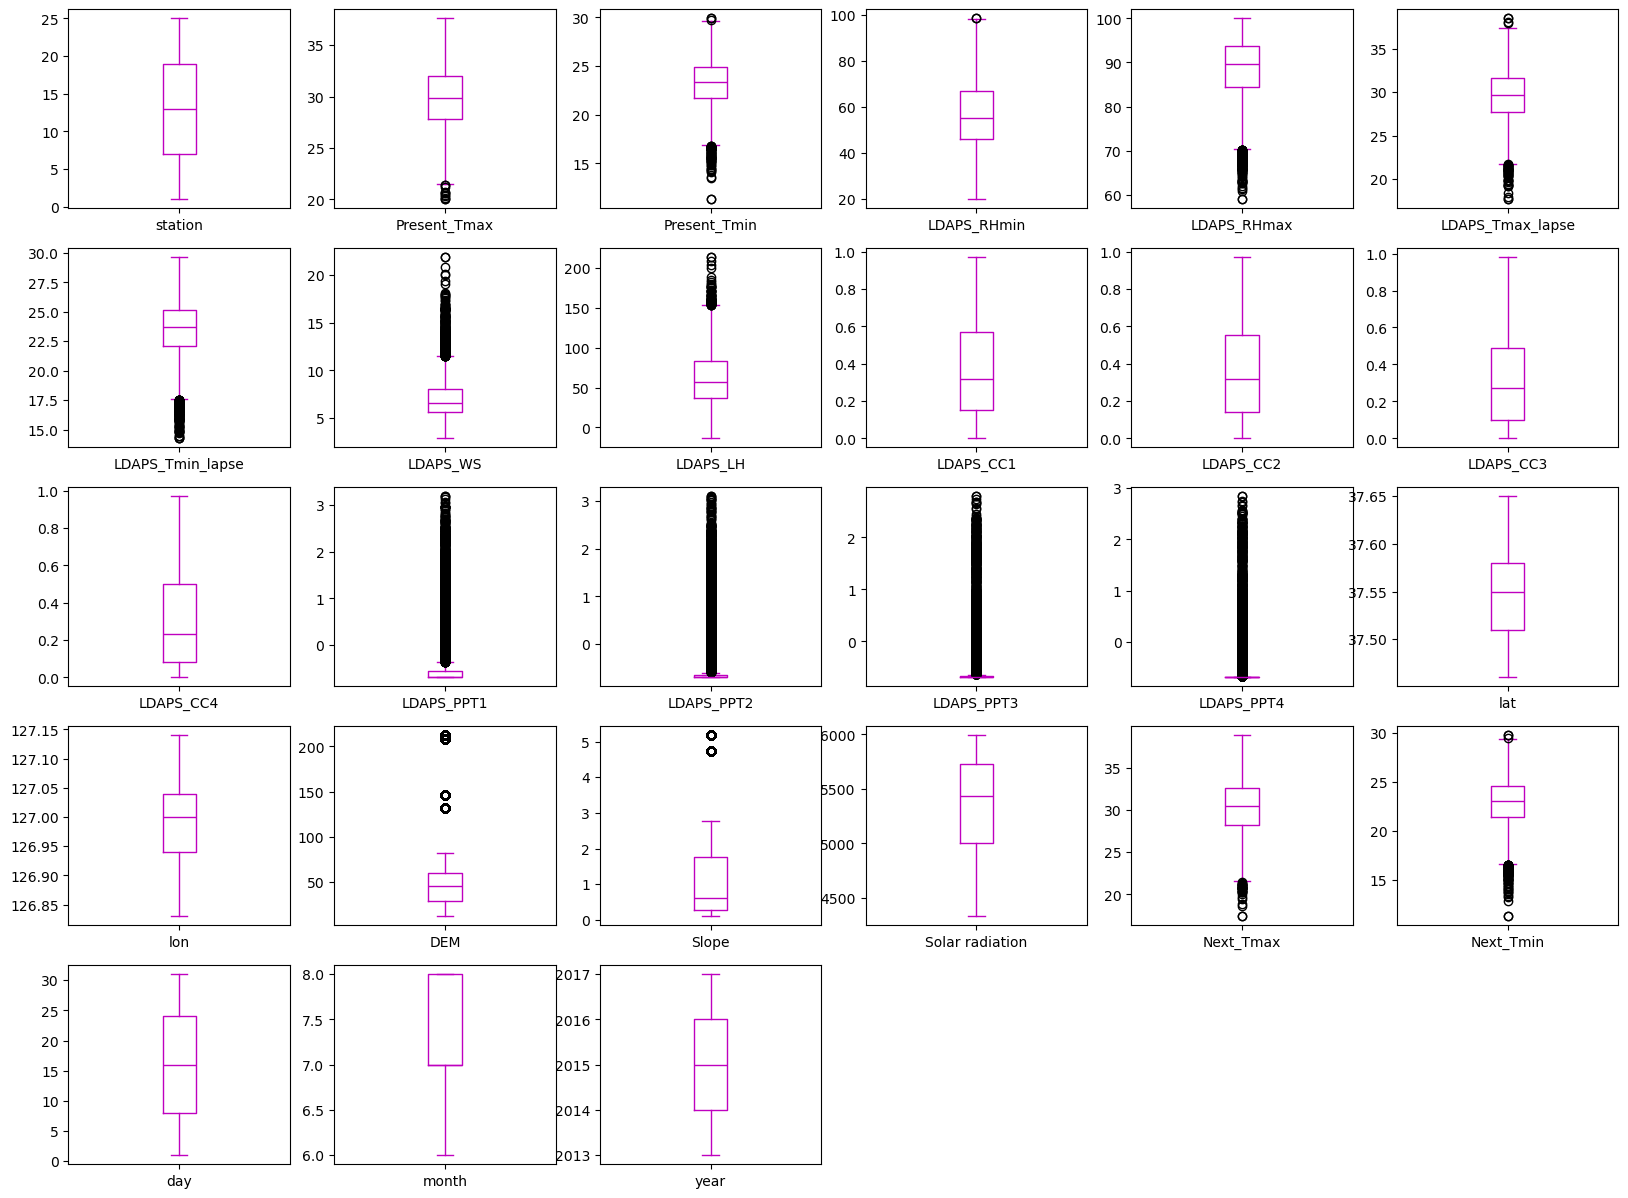

In [29]:
temp.plot(kind='box',subplots=True,layout=(5,6),figsize=(20,15),color='m')
plt.show()

# Lets Remove the Outlier using Zscore Method

In [30]:
from scipy.stats import zscore

In [31]:
z=np.abs(zscore(temp))
z.head(2)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.664315,0.361326,0.759529,0.102809,0.383579,0.526275,0.215346,0.127859,0.206911,0.531295,...,1.084163,0.025368,2.772312,1.111360,1.517944,0.376282,0.697599,1.571857,2.768118,1.414396
1,1.525622,0.721084,0.676296,0.308263,0.310920,0.080675,0.225978,0.647857,0.314766,0.531295,...,1.084163,0.482444,0.315212,0.545269,1.229943,0.072097,0.174064,1.571857,2.768118,1.414396


In [32]:
threshold=3

In [33]:
temp_df=temp[(z<3).all(axis=1)]
temp_df.head(2)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.26,91.12,28.07,23.01,6.82,69.45,0.23,...,37.6,126.99,212.34,2.78,5992.90,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.26,90.60,29.85,24.04,5.69,51.94,0.23,...,37.6,127.03,44.76,0.51,5869.31,30.5,22.5,30.0,6.0,2013.0


In [34]:
temp_df.shape

(6665, 27)

In [35]:
# How much percent data we have now
print(temp_df.shape[0]/temp.shape[0]*100)

85.97781217750257


# Data Visualization

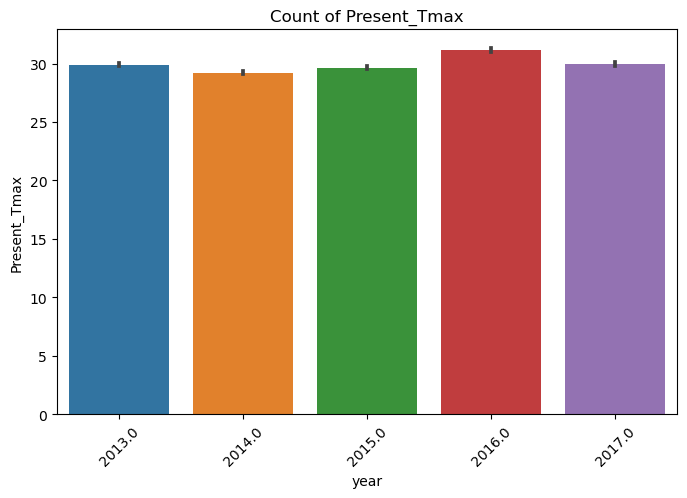

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x=temp_df.year, y=temp_df['Present_Tmax'])
plt.title('Count of Present_Tmax')
plt.xticks (rotation=45)
plt.show()

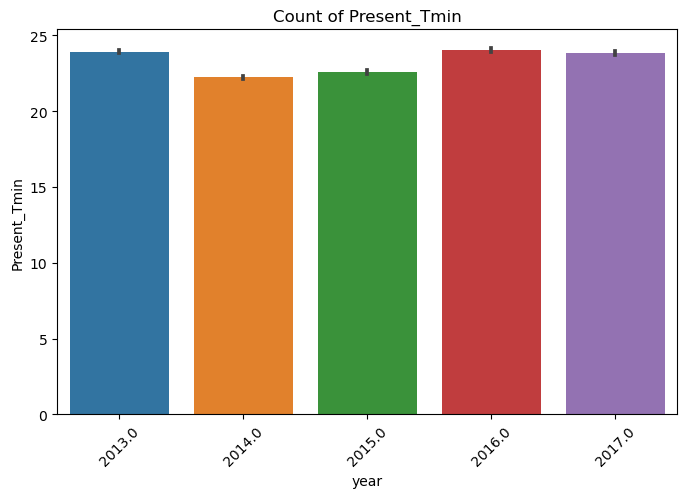

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x=temp_df.year, y=temp_df['Present_Tmin'])
plt.title('Count of Present_Tmin')
plt.xticks (rotation=45)
plt.show()

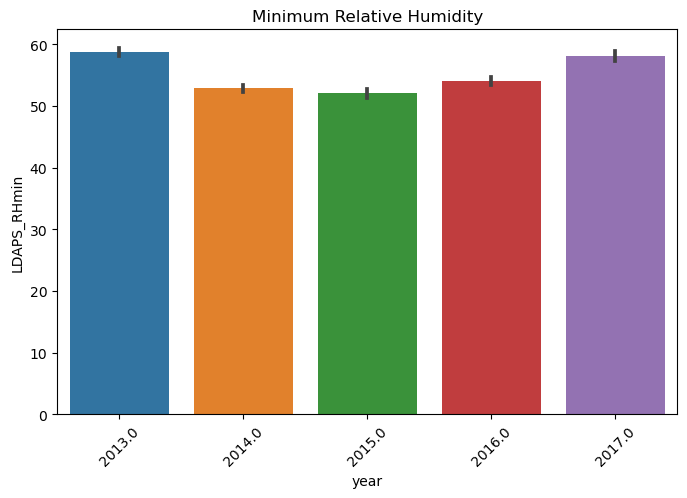

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x=temp_df.year, y=temp_df['LDAPS_RHmin'])
plt.title('Minimum Relative Humidity')
plt.xticks (rotation=45)
plt.show()

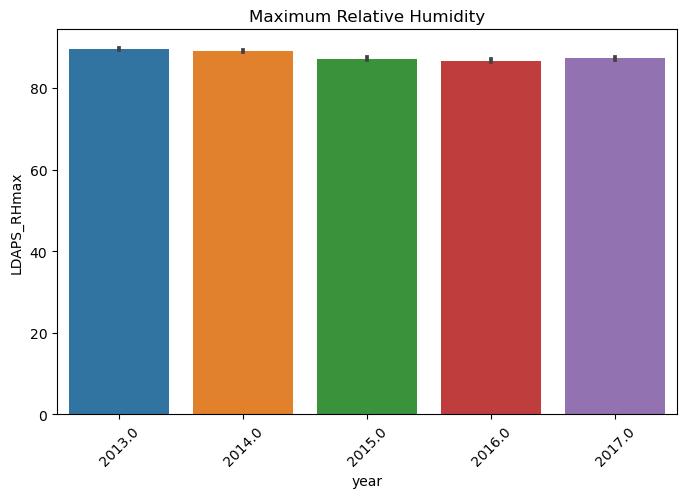

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x=temp_df.year, y=temp_df['LDAPS_RHmax'])
plt.title('Maximum Relative Humidity')
plt.xticks (rotation=45)
plt.show()

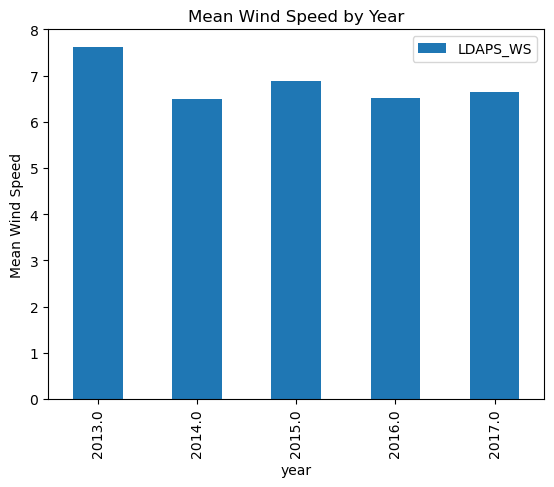

In [40]:
filtered_df = temp_df[temp_df['LDAPS_WS'].notna()]
grouped_df = filtered_df.groupby('year').mean()
plot_df = grouped_df[['LDAPS_WS']]
plot_df.plot(kind='bar')
plt.ylabel('Mean Wind Speed')
plt.title('Mean Wind Speed by Year')
plt.show()

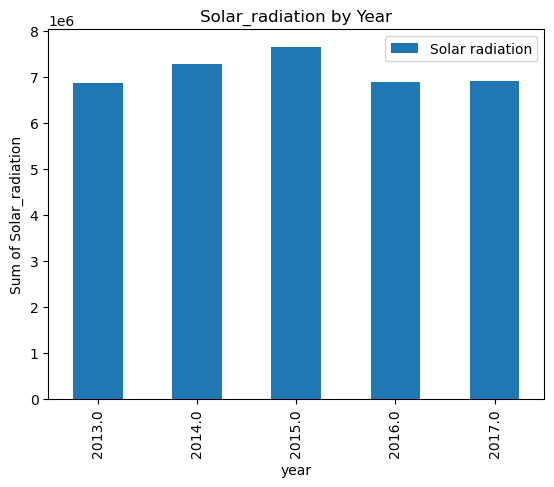

In [41]:
filtered_df = temp_df[temp_df['Solar radiation'].notna()]
grouped_df = filtered_df.groupby('year').sum()
plot_df = grouped_df[['Solar radiation']]
plot_df.plot(kind='bar')
plt.ylabel('Sum of Solar_radiation')
plt.title('Solar_radiation by Year')
plt.show()

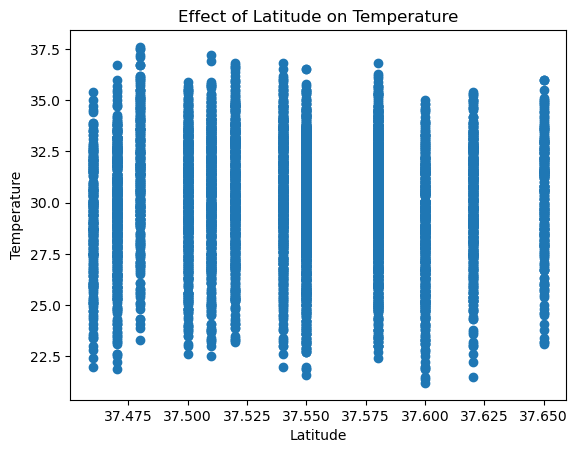

In [42]:
plt.scatter(temp_df['lat'], temp_df['Present_Tmax'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Effect of Latitude on Temperature')
plt.show()

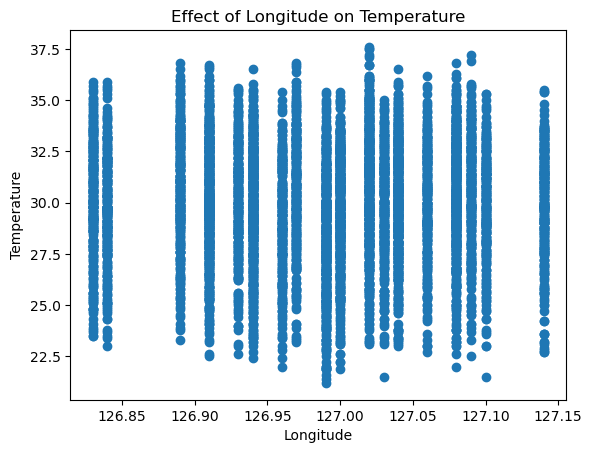

In [43]:
plt.scatter(temp_df['lon'], temp_df['Present_Tmax'])
plt.xlabel('Longitude')
plt.ylabel('Temperature')
plt.title('Effect of Longitude on Temperature')
plt.show()

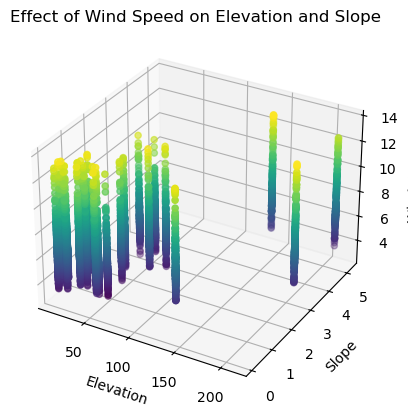

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(temp_df['DEM'], temp_df['Slope'], temp_df['LDAPS_WS'], c=temp_df['LDAPS_WS'])
ax.set_xlabel('Elevation')
ax.set_ylabel('Slope')
ax.set_zlabel('Wind Speed')
ax.set_title('Effect of Wind Speed on Elevation and Slope')
plt.show()

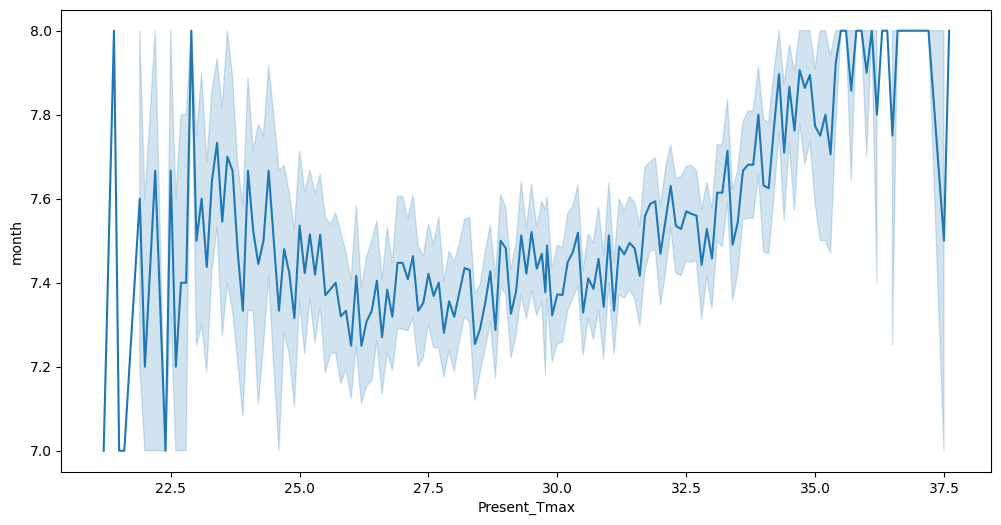

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Present_Tmax',y='month',data=temp_df)
plt.show()

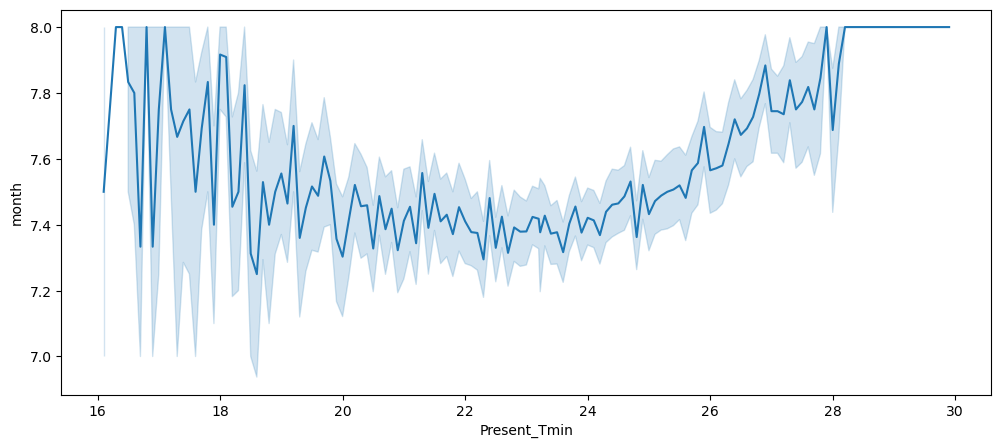

In [46]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Present_Tmin',y='month',data=temp_df)
plt.show()

# Checking Correlation

<Figure size 1500x800 with 0 Axes>

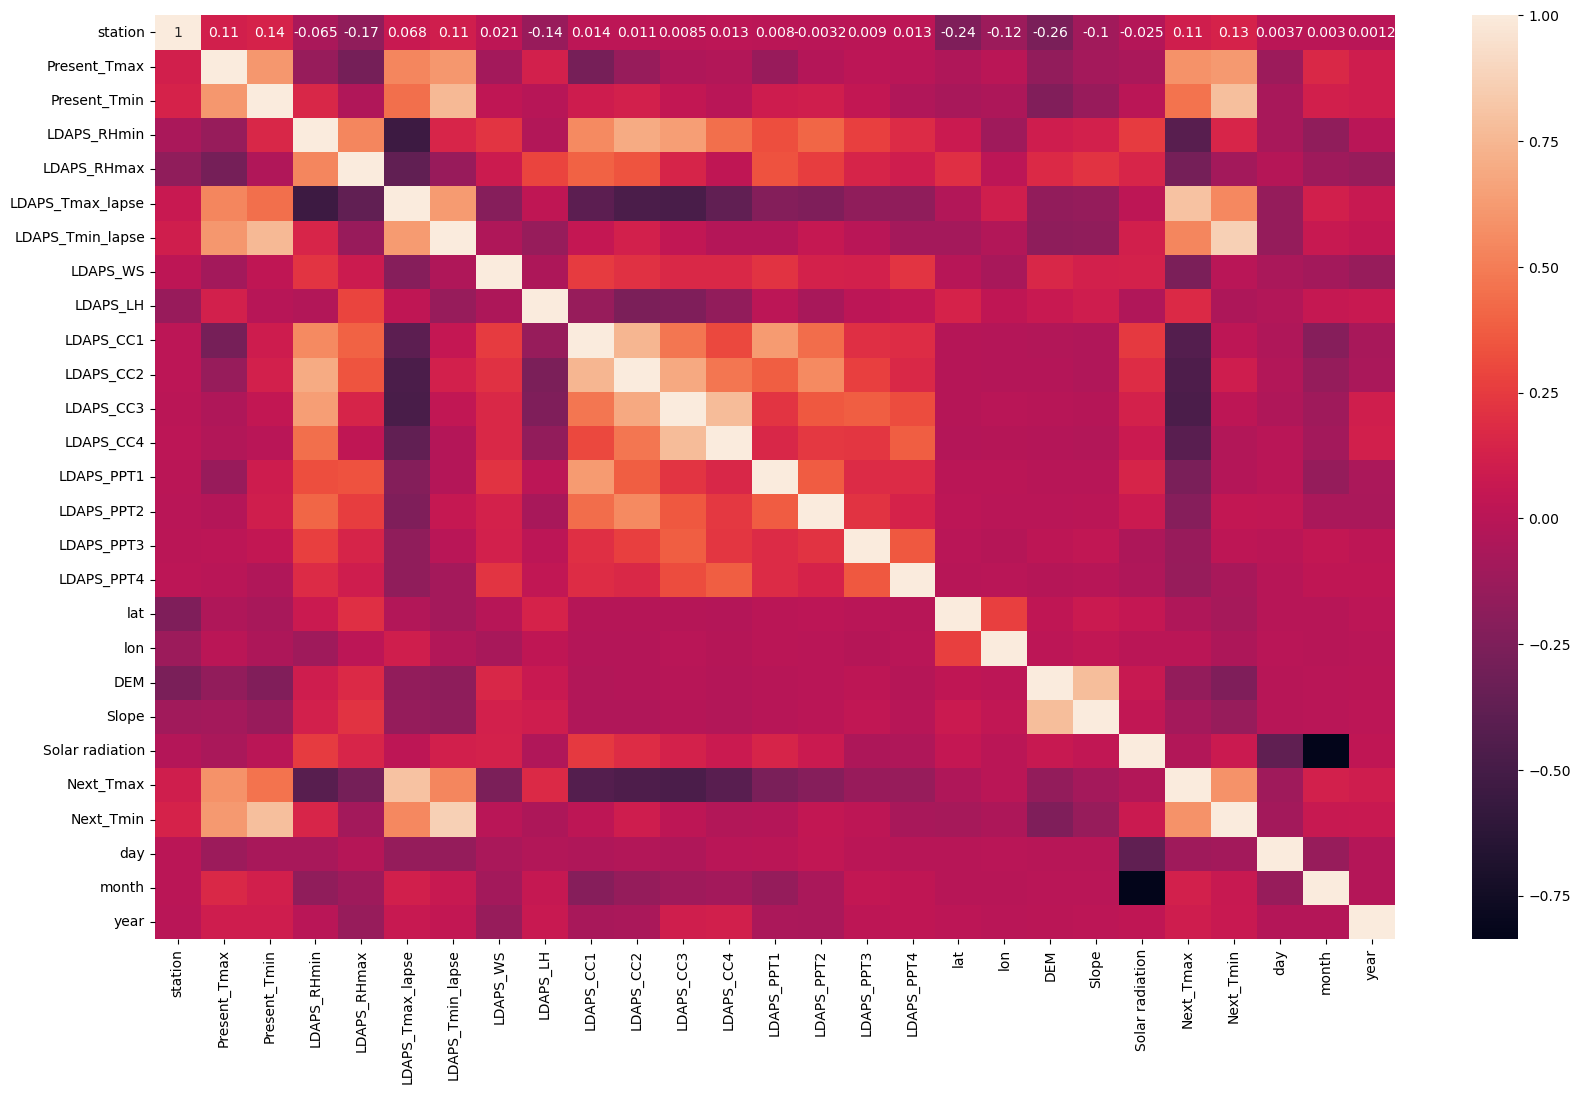

<Figure size 1500x800 with 0 Axes>

In [47]:
temp_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap( temp_df.corr(), annot=True);plt.figure(figsize=(15,8))

# Predicting - NEXT_TMAX

# Seprating the Data into X( Independent Variable) & Y ( Target Variable)

In [48]:
feature=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year']
x=temp_df[feature]
y=temp_df['Next_Tmax']

In [49]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.26,91.12,28.07,23.01,6.82,69.45,0.23,...,37.60,126.99,212.34,2.78,5992.90,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.26,90.60,29.85,24.04,5.69,51.94,0.23,...,37.60,127.03,44.76,0.51,5869.31,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.69,83.97,30.09,24.57,6.14,20.57,0.21,...,37.58,127.06,33.31,0.27,5863.56,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.24,96.48,29.70,23.33,5.65,65.73,0.22,...,37.65,127.02,45.72,2.53,5856.96,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.17,90.16,29.11,23.49,5.74,107.97,0.15,...,37.55,127.14,35.04,0.51,5859.55,31.2,22.5,30.0,6.0,2013.0


In [50]:
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

# Performing Standard Scaling - to make data into one frame

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,-1.674367,-0.447537,-0.823834,0.238498,0.461014,-0.696046,-0.291783,-0.005716,0.220988,-0.429834,...,1.116910,-0.014262,2.821353,1.144998,1.557503,-0.528857,-0.806733,1.580087,-2.796326,-1.426027
1,-1.535422,0.682718,-0.737166,-0.206493,0.385821,-0.038085,0.172049,-0.631524,-0.301479,-0.429834,...,1.116910,0.491341,-0.304092,-0.537304,1.262389,-0.045056,-0.253897,1.580087,-2.796326,-1.426027
2,-1.396477,0.576756,-0.000489,-0.471262,-0.572896,0.050629,0.410720,-0.382308,-1.237504,-0.511815,...,0.717789,0.870543,-0.517639,-0.715169,1.248659,0.162287,0.341466,1.580087,-2.796326,-1.426027
3,-1.257532,0.718038,0.042844,0.237014,1.236086,-0.093531,-0.147680,-0.653676,0.109990,-0.470825,...,2.114713,0.364940,-0.286187,0.959723,1.232899,0.369630,0.511569,1.580087,-2.796326,-1.426027
4,-1.118586,0.506115,-0.607164,0.083493,0.322196,-0.311619,-0.075628,-0.603833,1.370356,-0.757757,...,0.119108,1.881748,-0.485374,-0.537304,1.239084,0.196844,-0.253897,1.580087,-2.796326,-1.426027


# Variance Inflation Factor - to check the mullticollinearity Column

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['features']=x.columns
vif

,VIF Values,features
0,1.256238,station
1,2.892598,Present_Tmax
2,3.452131,Present_Tmin
3,5.870520,LDAPS_RHmin
4,2.266147,LDAPS_RHmax
5,8.514251,LDAPS_Tmax_lapse
6,8.804588,LDAPS_Tmin_lapse
7,1.332727,LDAPS_WS
8,1.579361,LDAPS_LH
9,3.865378,LDAPS_CC1


#Droping Solar Radiation and LDAPS_Tmin_lapse column which have highest VIF that indicates multicollinearity towards Target Varaible

In [55]:
x.drop(columns='Solar radiation',inplace=True)
x.drop(columns='LDAPS_Tmin_lapse',inplace=True)

In [56]:
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['features']=x.columns
vif

,VIF Values,features
0,1.246590,station
1,2.699851,Present_Tmax
2,3.290771,Present_Tmin
3,4.472732,LDAPS_RHmin
4,2.226138,LDAPS_RHmax
5,5.033487,LDAPS_Tmax_lapse
6,1.321008,LDAPS_WS
7,1.519915,LDAPS_LH
8,3.781840,LDAPS_CC1
9,4.723674,LDAPS_CC2


# Importing Machine Learning Libraries (Regression)

In [57]:
# Regression Model
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import f1_score

# Splitting Data into Testing and Training

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=49)

# Checking Profile of Training and Testing

In [59]:
print('Train cases as below')
print('X_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (5332, 25)
y_train shape:  (5332,)

Test cases as below
X_test shape:  (1333, 25)
y_test shape:  (1333,)


In [60]:
display(x_train.head(2))
print('\n')
display(x_test.head(2))
print('\n')
display(y_train.head(2))
print('\n')
display(y_test.head(2))

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Next_Tmax,Next_Tmin,day,month,year
5745,-0.284916,-0.059012,-0.000489,-0.268049,-0.708823,1.137375,-0.443227,-0.378163,-0.921719,-1.037462,...,-0.294905,-0.080453,1.123344,-0.603618,-0.455783,1.060773,0.724199,0.233405,-0.902655,1.442814
2865,0.409810,-0.412217,-0.997170,-0.746414,-0.682795,0.889715,-0.570604,0.468049,0.553935,-0.174980,...,-0.294905,-1.477376,0.112139,0.395860,0.759625,0.646087,-0.764207,-0.776607,-0.902655,0.008393


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Next_Tmax,Next_Tmin,day,month,year
3623,0.826645,0.152911,-0.043823,-1.454690,-1.397133,0.911894,-0.315851,-0.347728,-1.208651,-0.864965,...,-0.294905,0.717789,-0.646265,0.261577,0.396485,0.611530,-0.764207,-0.552160,0.991016,0.008393
3480,-0.840696,0.682718,1.212860,0.459509,0.518856,0.420271,-1.501009,1.567587,-0.593796,-0.476849,...,-0.294905,0.717789,-1.910271,-0.908180,-0.841156,1.164444,1.234510,-1.225501,0.991016,0.008393


6660    33.7
3340    32.5
Name: Next_Tmax, dtype: float64

4168    32.4
4006    34.0
Name: Next_Tmax, dtype: float64

# Predicting which model is best

In [61]:
dtr=DecisionTreeRegressor()
svr=SVR()
knr=KNeighborsRegressor()
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()

model=[dtr,svr,knr,lr,lasso,ridge]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('R_2 SCORE -',m,r2_score(y_test,predm))
    print('MEan Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean_Absolute_Squared:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

R_2 SCORE - DecisionTreeRegressor() 0.9998493491269427
MEan Absolute Error: 0.0021005251312978183
Mean_Absolute_Squared: 0.0012303075768942203
Root Mean Squared Error: 0.03507574057513569


R_2 SCORE - SVR() 0.9910147309433461
MEan Absolute Error: 0.14434154058414894
Mean_Absolute_Squared: 0.07337922692704926
Root Mean Squared Error: 0.27088600356432085


R_2 SCORE - KNeighborsRegressor() 0.9131041319317877
MEan Absolute Error: 0.6475132472438498
Mean_Absolute_Squared: 0.7096450403205633
Root Mean Squared Error: 0.8424043211668393


R_2 SCORE - LinearRegression() 1.0
MEan Absolute Error: 3.86187705970137e-15
Mean_Absolute_Squared: 2.879431073100791e-29
Root Mean Squared Error: 5.36603305347702e-15


R_2 SCORE - Lasso() 0.8820439156265366
MEan Absolute Error: 0.7917511869630954
Mean_Absolute_Squared: 0.963301847511935
Root Mean Squared Error: 0.9814794177729531


R_2 SCORE - Ridge() 0.999999846279907
MEan Absolute Error: 0.0008619469918204144
Mean_Absolute_Squared: 1.2553727120453815e-0

# Observation - 
        By checking the model Linear Regression, SVR, Decision Tree Regression is the best model 

# Cross Validation Score -- to confirm which model is best

In [62]:
from sklearn .model_selection import cross_val_score

In [63]:
model = [('dtr', dtr), ('svr', svr), ('knr', knr), ('lr', lr), ('lasso', lasso), ('ridge', ridge)]
for name, m in model:
    score = cross_val_score(m, x, y, cv=5, scoring='r2')
    print("Score for", name, score)
    print("Score_Mean -", name, score.mean())
    print("Difference between R2_Score & CV Score -", name, (r2_score(y_test, m.predict(x_test)) - score.mean()) * 100)
    print('\n')

Score for dtr [0.99999765 0.99981622 0.9999912  0.99919748 0.99999835]
Score_Mean - dtr 0.9998001825350299
Difference between R2_Score & CV Score - dtr 0.004916659191278594


Score for svr [0.95860809 0.9376355  0.97180299 0.97637312 0.95575073]
Score_Mean - svr 0.9600340836462535
Difference between R2_Score & CV Score - svr 3.09806472970926


Score for knr [0.72802239 0.59381349 0.71045437 0.77768603 0.69107243]
Score_Mean - knr 0.70020973900813
Difference between R2_Score & CV Score - knr 21.289439292365774


Score for lr [1. 1. 1. 1. 1.]
Score_Mean - lr 1.0
Difference between R2_Score & CV Score - lr 0.0


Score for lasso [0.89331014 0.85944    0.8905626  0.79793212 0.87155463]
Score_Mean - lasso 0.8625598971477867
Difference between R2_Score & CV Score - lasso 1.948401847874992


Score for ridge [0.99999982 0.99999977 0.99999978 0.99999978 0.99999965]
Score_Mean - ridge 0.9999997598622634
Difference between R2_Score & CV Score - ridge 8.641764359662574e-06




# We Found that Linear Regression is the best model here

In [64]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [65]:
training_data_prediction=regressor.predict(x_train)

In [66]:
r2_train=r2_score(y_train,training_data_prediction)
print('R Squared Value -',r2_train)

R Squared Value - 1.0


In [67]:
test_data_prediction=regressor.predict(x_test)

# Saving the model using JobLib

In [68]:
import joblib

In [69]:
joblib.dump(test_data_prediction,'NextDayMaximumTemp.pkl')

['NextDayMaximumTemp.pkl']

# Comparison between Prediction and original

In [70]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=test_data_prediction
df["Original"]=a
df

,Predicted,Original
0,32.4,32.4
1,34.0,34.0
2,32.6,32.6
3,31.4,31.4
4,31.4,31.4
...,...,...
1328,28.4,28.4
1329,32.4,32.4
1330,32.1,32.1
1331,30.4,30.4


# Prediction of ---> 'Next_Tmin'

In [71]:
#Seprating the Dataframe

In [72]:
feature=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
        'Next_Tmax', 'Next_Tmax', 'day', 'month', 'year']
x=x[feature]
y=temp_df['Next_Tmin']

In [73]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Next_Tmax,Next_Tmax,day,month,year
0,-1.674367,-0.447537,-0.823834,0.238498,0.461014,-0.696046,-0.005716,0.220988,-0.429834,-0.519973,...,-0.294905,1.116910,-0.014262,2.821353,1.144998,-0.528857,-0.528857,1.580087,-2.796326,-1.426027
1,-1.535422,0.682718,-0.737166,-0.206493,0.385821,-0.038085,-0.631524,-0.301479,-0.429834,-0.304353,...,-0.294905,1.116910,0.491341,-0.304092,-0.537304,-0.045056,-0.045056,1.580087,-2.796326,-1.426027
2,-1.396477,0.576756,-0.000489,-0.471262,-0.572896,0.050629,-0.382308,-1.237504,-0.511815,-0.261229,...,-0.294905,0.717789,0.870543,-0.517639,-0.715169,0.162287,0.162287,1.580087,-2.796326,-1.426027
3,-1.257532,0.718038,0.042844,0.237014,1.236086,-0.093531,-0.653676,0.109990,-0.470825,-0.390601,...,-0.294905,2.114713,0.364940,-0.286187,0.959723,0.369630,0.369630,1.580087,-2.796326,-1.426027
4,-1.118586,0.506115,-0.607164,0.083493,0.322196,-0.311619,-0.603833,1.370356,-0.757757,-0.304353,...,-0.294905,0.119108,1.881748,-0.485374,-0.537304,0.196844,0.196844,1.580087,-2.796326,-1.426027


In [74]:
# Splitting data into Training & Testing Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=49)

# Checking which model is performing best

In [75]:
dtr=DecisionTreeRegressor()
svr=SVR()
knr=KNeighborsRegressor()
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()

model=[dtr,svr,knr,lr,lasso,ridge]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('R_2 SCORE -',m,r2_score(y_test,predm))
    print('MEan Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean_Absolute_Squared:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

R_2 SCORE - DecisionTreeRegressor() 0.729575647694005
MEan Absolute Error: 0.8770872297734629
Mean_Absolute_Squared: 1.468253896026644
Root Mean Squared Error: 1.2117152701961975


R_2 SCORE - SVR() 0.891881265357195
MEan Absolute Error: 0.5915244610715816
Mean_Absolute_Squared: 0.5870246226683855
Root Mean Squared Error: 0.7661753211037181


R_2 SCORE - KNeighborsRegressor() 0.8506764845469315
MEan Absolute Error: 0.6827016699029125
Mean_Absolute_Squared: 0.810743675496647
Root Mean Squared Error: 0.9004130582663976


R_2 SCORE - LinearRegression() 0.7920573731445709
MEan Absolute Error: 0.839735364177203
Mean_Absolute_Squared: 1.129012862292173
Root Mean Squared Error: 1.062550169305983


R_2 SCORE - Lasso() 0.45574286550121434
MEan Absolute Error: 1.376246414267519
Mean_Absolute_Squared: 2.955013671490353
Root Mean Squared Error: 1.7190153203186855


R_2 SCORE - Ridge() 0.792077215232172
MEan Absolute Error: 0.839702923994942
Mean_Absolute_Squared: 1.1289051307873095
Root Mean Squar

# Observation -->
        1. Support Vector Regression,Ridge is the best model here
# Lets Chect it by Cross Validation Score

In [76]:
model = [('dtr', dtr), ('svr', svr), ('knr', knr), ('lr', lr), ('lasso', lasso), ('ridge', ridge)]
for name, m in model:
    score = cross_val_score(m, x, y, cv=5, scoring='r2')
    print("Score for", name, score)
    print("Score_Mean -", name, score.mean())
    print("Difference between R2_Score & CV Score -", name, (r2_score(y_test, m.predict(x_test)) - score.mean()) * 100)
    print('\n')

Score for dtr [0.07437568 0.19594202 0.38386794 0.66055529 0.57016738]
Score_Mean - dtr 0.3769816594268287
Difference between R2_Score & CV Score - dtr 35.25939882671763


Score for svr [0.56906469 0.62151261 0.72955587 0.80981101 0.79595403]
Score_Mean - svr 0.7051796418445191
Difference between R2_Score & CV Score - svr 18.670162351267592


Score for knr [0.24982225 0.37991642 0.51671157 0.68629164 0.71160049]
Score_Mean - knr 0.5088684748072778
Difference between R2_Score & CV Score - knr 34.18080097396536


Score for lr [0.64527396 0.62669064 0.71114329 0.84712908 0.81420541]
Score_Mean - lr 0.7288884762284653
Difference between R2_Score & CV Score - lr 6.316889691610561


Score for lasso [0.31029438 0.16328522 0.38684657 0.35848465 0.45845667]
Score_Mean - lasso 0.33547349953420735
Difference between R2_Score & CV Score - lasso 12.026936596700699


Score for ridge [0.64517361 0.62669945 0.71118393 0.84712482 0.81426697]
Score_Mean - ridge 0.7288897561770138
Difference between R2_S

# By performing Cross Validation Score we find 'Linear Regression' is the best model 
# Lets Hypertune our model for better Prediction

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X':[True,False],
    'n_jobs':[True, False]
}

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Perform Grid Search
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': True}
Best score: -1.1566560841091262


In [78]:
regressor = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= True)
regressor.fit(x_train, y_train)

LinearRegression(n_jobs=True)

In [79]:
training_data_prediction=regressor.predict(x_train)

In [80]:
r2_train=r2_score(y_train,training_data_prediction)
print('R Squared Value -',r2_train)

R Squared Value - 0.7952162761635364


In [81]:
test_data_prediction=regressor.predict(x_test)

In [82]:
r2_test=r2_score(y_test,test_data_prediction)
print('R Squared Value -',r2_test)

R Squared Value - 0.7920573731445709


# Saving Our model 

In [83]:
import joblib

In [84]:
joblib.dump(test_data_prediction,'NextDayMinimumTemp.pkl')

['NextDayMinimumTemp.pkl']

In [85]:
# Comparison between Prediction and original

In [86]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=test_data_prediction
df["Original"]=a
df

,Predicted,Original
0,22.661887,21.3
1,25.225915,26.0
2,21.031285,20.3
3,23.345955,19.5
4,24.349314,23.4
...,...,...
1995,20.215977,22.4
1996,23.579068,23.8
1997,19.351215,19.0
1998,22.675751,20.4


# What we have done -->
        1.  Importing Libraries
        2.  Importing Dataset
        3.  Checking Dataset
        4.  Lets make the dataframe into Round Figure upto 2 decimal
        5.  Checking profile of Dataset
        6.  Checking Null Values of Dataset
        6.  Seprating Date into Day, Month & Year
        7.  Droping Date Column
        8.  Checking Statistics of the dataset 
        9.  Checking Skewness
                9.1..  Remove Skewness of 5 columns
        10.  Checking Outlier
                10.1.. Remove Outliers using Zscore method
        11.  Visualization of Data - 
                11.1..  Countplot of Present_Tmax on year
                11.2..  Which year Tempreature is minimum
                11.3..  Which year Humidity is maximum
                11.4..  Which year Humidity is minimum
                11.5..  Mean Wind Speed year wise
                11.6..  Solar Radiation per year
                11.7..  Effect of Latitude on Tempreature
                11.8..  Effect of Longitude on Tempreature
                11.9..  Effect of Wind Speed on Elevation an Slope
                11.10.. Maximum & Minimum Tempreature per month Using Line Plot
        12.  Checking Correlation
        13.  Predicting the model 'Next_Tmax'
                13.1..  Seprating Data into X (Independent), Y(Target)
                13.2..  Standard Scaling
                13.3..  Checking Multicollinearity usin Variance Inflation Factor
                        13.3.1..  Droping High Multicollinear Columns
                13.4..  Importing Machine Learing Libraries(Regression)
                13.5..  Splitting Testing & Training Data
                13.6..  Checking which model is best
                13.7..  Cross Validation Score -- to confirm which model is best
        14.  Predicting the model by using 'Linear Regression Model'
        15.  Comparison between Prediction and original

        16.  Predicting the model 'Next_Tmin'
                16.1..  Seprating Data into X (Independent), Y(Target)
                16.2..  Standard Scaling
                16.3..  Checking Multicollinearity usin Variance Inflation Factor
                        16.3.1..  Droping High Multicollinear Columns
                16.4..  Importing Machine Learing Libraries(Regression)
                16.5..  Splitting Testing & Training Data
                16.6..  Checking which model is best
                16.7..  Cross Validation Score -- to confirm which model is best
                16.8..  Hypertuning Our Model
                16.9..  Adding Parameter to the model 
        16.  Predicting the model by using 'Linear Regression Model'
        17.  Comparison between Prediction and original

# Thankyou